In [1]:
# IMPORT REQUIRED LIBRARIES

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold, train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import shuffle

from models import PLS_DA

SEED = 9

In [2]:
# IMPORT PROCESSED DATA

turkish_abs = pd.read_csv("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Data\\TurkishAbs.csv", index_col=0)
polish_abs = pd.read_csv("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Data\\PolishAbs.csv", index_col=0)

turkish_abs.drop('Name', axis='columns', inplace=True)
polish_abs.drop('Name', axis='columns', inplace=True)

wavelengths = turkish_abs.iloc[:, :-2].columns

turkish_mean = turkish_abs.groupby(['Group']).mean()
turkish_mean.reset_index(drop=True, inplace=True)

polish_mean = polish_abs.groupby(['Group']).mean()
polish_mean.reset_index(drop=True, inplace=True)

Assign class labels to polish and turkish apple spectra.

In [3]:
polish_mean['Class'] = 0
turkish_mean['Class'] = 1

abs_df = pd.concat([polish_mean, turkish_mean], ignore_index=True)

### Exploratory Data Analysis

Plot polish and apple spectra

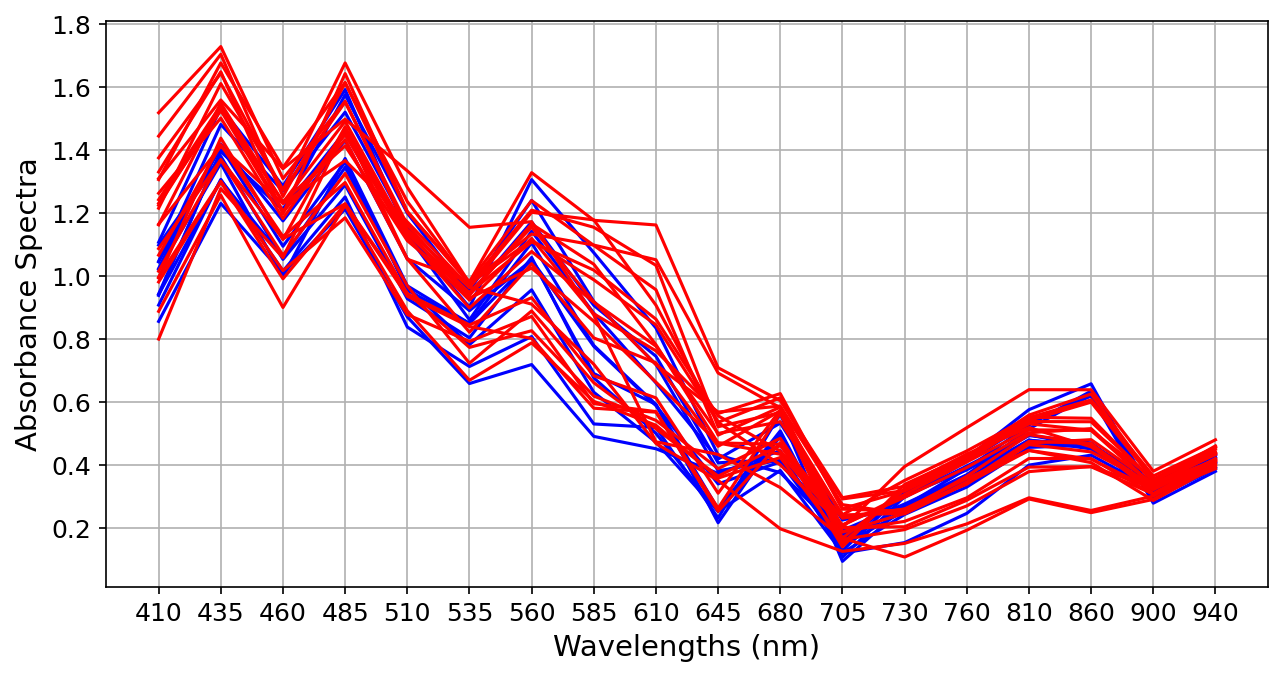

In [ ]:
plt.figure(figsize=(10, 5), dpi=150)

c = lambda x: 'r' if x==1 else 'b'

for i in range(abs_df.shape[0]):
    plt.plot(wavelengths, abs_df.iloc[i, :-2], color=c(abs_df['Class'][i]))

plt.xticks(ticks=list(range(18)), 
            labels=["410", "435", "460", "485", "510", "535", "560", "585", "610", "645", "680", "705", "730", "760",
                    "810", "860", "900", "940"],
            fontsize=12)

plt.yticks(fontsize=12)

plt.xlabel('Wavelengths (nm)', fontsize=14)
plt.ylabel('Absorbance Spectra', fontsize=14)
plt.grid(visible=True)
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\pol_turk_apples.png")
plt.show()

Plot polish and apple absorbance values' density plots.

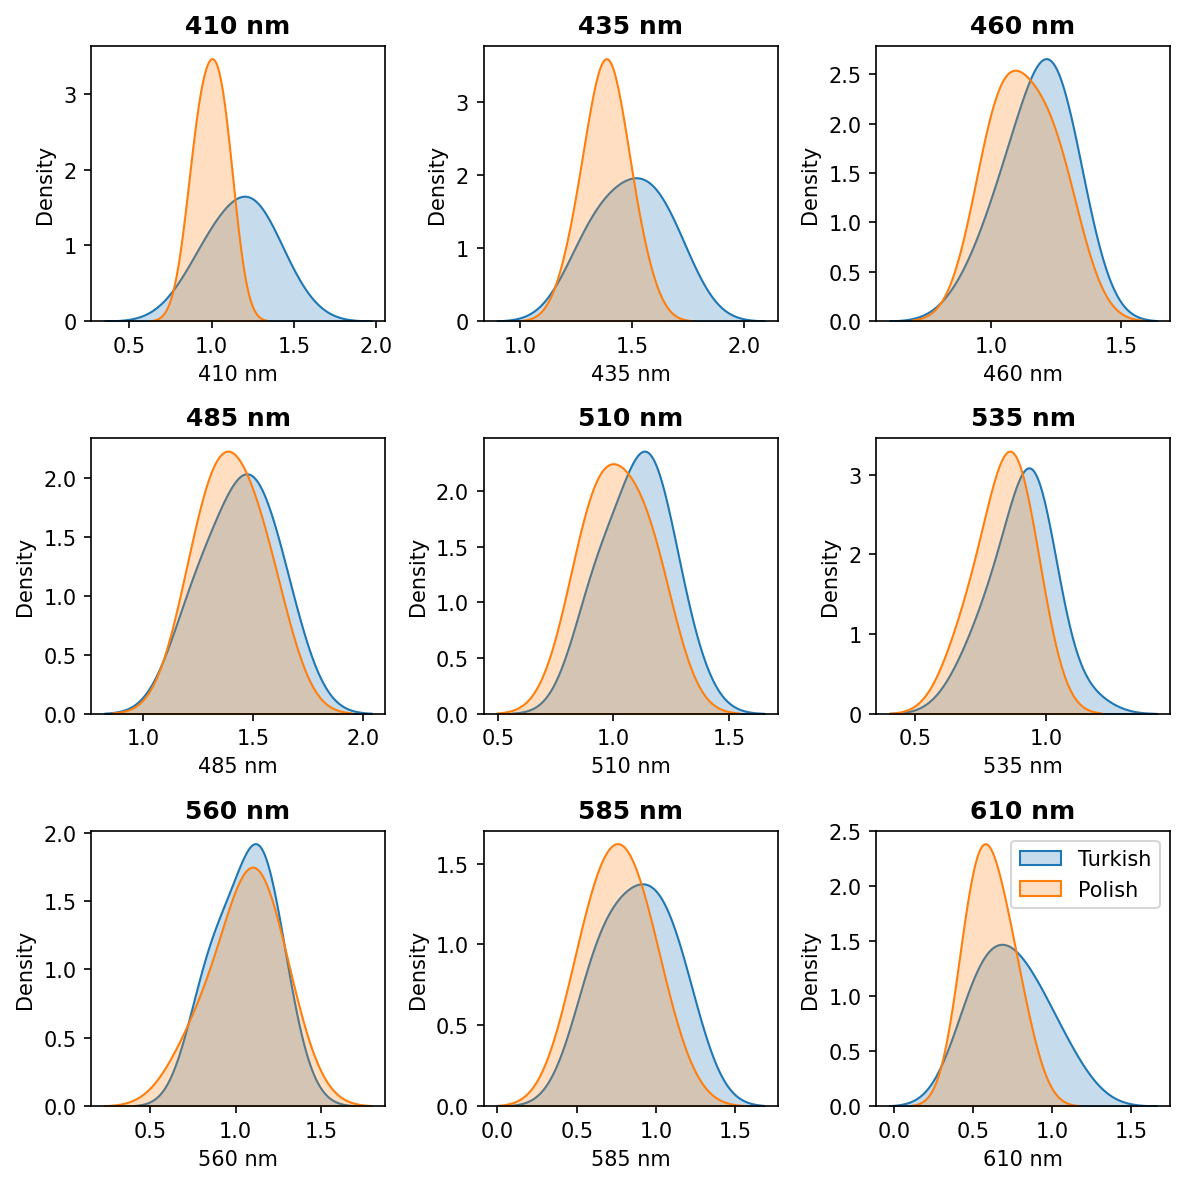

In [14]:
fig, axes = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, axe in enumerate(axes):
    for j, a in enumerate(axe):
        sns.kdeplot(turkish_mean.iloc[:, 3*i+j], ax=a, fill=True, bw_adjust=1.5, label='Turkish')
        sns.kdeplot(polish_mean.iloc[:, 3*i+j], ax=a, fill=True, bw_adjust=1.5, label='Polish')
        a.set_title(abs_df.columns[3*i+j], fontweight="bold")

fig.tight_layout()
plt.legend()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\pol_turk_dist_1.png")
plt.show()

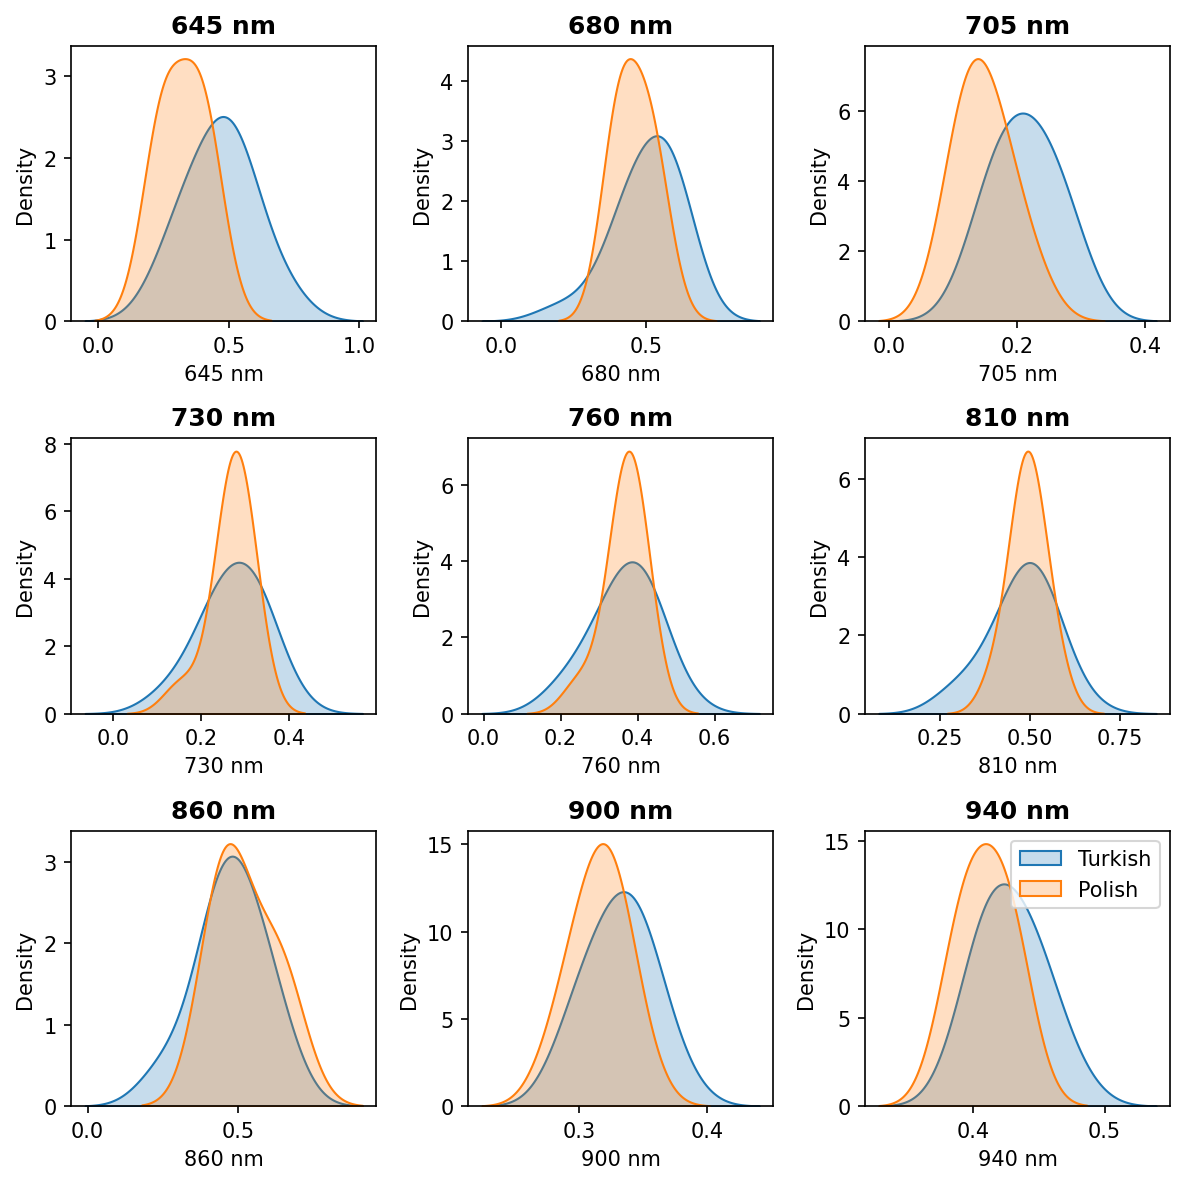

In [15]:
fig, axes = plt.subplots(3, 3, squeeze=False, figsize=(8, 8), dpi=150)

for i, axe in enumerate(axes):
    for j, a in enumerate(axe):
        sns.kdeplot(turkish_mean.iloc[:, 9+3*i+j], ax=a, fill=True, bw_adjust=1.5, label='Turkish')
        sns.kdeplot(polish_mean.iloc[:, 9+3*i+j], ax=a, fill=True, bw_adjust=1.5, label='Polish')
        a.set_title(abs_df.columns[9+3*i+j], fontweight="bold")

fig.tight_layout()
plt.legend(loc=0)
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\pol_turk_dist_2.png")
plt.show()

In [4]:
abs_df.drop('Brix Values', axis='columns', inplace=True)

In [5]:
abs_df = shuffle(abs_df, random_state=SEED)

### Classification

1. LDA

In [6]:
X, y = abs_df.values[:, :-1], abs_df.values[:, -1]

clf = LinearDiscriminantAnalysis(solver='lsqr', n_components=1, shrinkage=0.05)

clf.fit(X, y)

y_pred = clf.predict(X).squeeze()

# Calculate Train Metrics
acc = accuracy_score(y, y_pred)

f1 = f1_score(y, y_pred)

# Calculate Validation Metrics
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
                         
val_metrics = cross_validate(clf,
                             X, y,
                             scoring=["accuracy", "f1"], 
                             cv=kf,
                             n_jobs=-1, 
                             verbose=0)

print("TRAINING: -")
print("ACCURACY:", acc)
print("F1:", f1)
print()
print("VALIDATION: -")
print("ACCURACY:", np.mean(val_metrics['test_accuracy']), end=", ")
print("Standard Deviation:", np.std(val_metrics['test_accuracy']))
print("F1:", np.mean(val_metrics['test_f1']), end=", ")
print("Standard Deviation:", np.std(val_metrics['test_f1']))

TRAINING: -
ACCURACY: 0.9375
F1: 0.9523809523809523

VALIDATION: -
ACCURACY: 0.9060606060606061, Standard Deviation: 0.004285495643554809
F1: 0.9299145299145298, Standard Deviation: 0.0048349181619593345


2. PLS-DA

In [7]:
X, y = abs_df.values[:, :-1], abs_df.values[:, -1]

clf = PLS_DA(n_components=4, shrinkage=0.05)

clf.fit(X, y)

y_pred = clf.predict(X).squeeze()

# Calculate Train Metrics
acc = accuracy_score(y, y_pred)

f1 = f1_score(y, y_pred)

# Calculate Validation Metrics
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=90)
                         
val_metrics = cross_validate(clf,
                             X, y,
                             scoring=["accuracy", "f1"], 
                             cv=kf,
                             n_jobs=-1, 
                             verbose=0)

print("TRAINING: -")
print("ACCURACY:", acc)
print("F1:", f1)
print()
print("VALIDATION: -")
print("ACCURACY:", np.mean(val_metrics['test_accuracy']), end=", ")
print("Standard Deviation:", np.std(val_metrics['test_accuracy']))
print("F1:", np.mean(val_metrics['test_f1']), end=", ")
print("Standard Deviation:", np.std(val_metrics['test_f1']))

TRAINING: -
ACCURACY: 0.9375
F1: 0.9523809523809523

VALIDATION: -
ACCURACY: 0.9060606060606061, Standard Deviation: 0.0743505705841533
F1: 0.9267399267399267, Standard Deviation: 0.058378671979887296


Performance Analysis

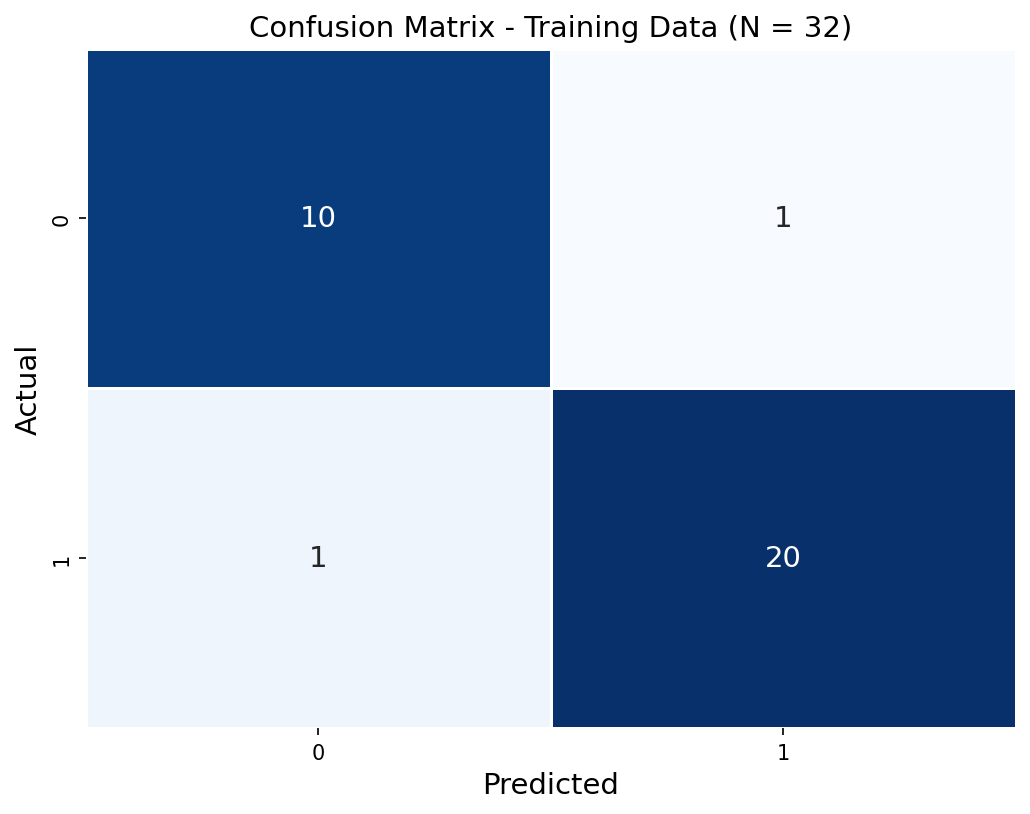

In [9]:
conf_mat = confusion_matrix(y, y_pred)
conf_mat_frac = conf_mat/conf_mat.sum(axis=1)

plt.figure(figsize=(8,6), dpi=150)

ax = sns.heatmap(conf_mat_frac, linewidth=0.5, cmap="Blues", annot=conf_mat, annot_kws={"size":14}, fmt='.0f', cbar=False)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - Training Data (N = {})'.format(y.shape[0]), fontsize=14)
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\pol_turk_conf.png")
plt.show()

<Figure size 6000x6000 with 0 Axes>

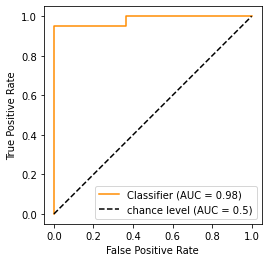

In [10]:
from sklearn.metrics import RocCurveDisplay

y_score = clf.predict_proba(X)

plt.figure(figsize=(12, 12), dpi=500)

RocCurveDisplay.from_predictions(
    y,
    y_score[:, 1],
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("C:\\Users\\argan\\OneDrive\\Desktop\\DDP\\Final Report\\pol_turk_roc.png")
plt.show()